In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from single_population_discrete import SinglePopulationDiscrete
from aux import subplots1D

%load_ext autoreload

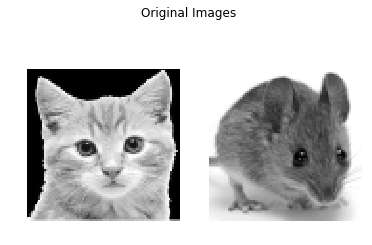

In [2]:
# Load raw images
# img1 = (mpimg.imread('../img/cat3.png')[:,:,0] > 0.5).astype(int)
# img2 = (mpimg.imread('../img/mouse3.png')[:,:,0] > 0.5).astype(int)
img1 = mpimg.imread('../img/cat4.png')
img2 = mpimg.imread('../img/mouse4.png')

# Plot raw images
fig, axis = plt.subplots(ncols=2)
axis[0].imshow(img1, cmap='gray')
axis[1].imshow(img2, cmap='gray')
axis[0].set_axis_off()
axis[1].set_axis_off()
plt.suptitle('Original Images');

In [3]:
############################################
# Initialize a network with sparse connectivity
############################################
N_EXC = img1.shape[0] * img1.shape[1]
N_INH = int(N_EXC / 5)
print('Number of neurons is', [N_EXC, N_INH])

param = {
    'N_EXC' : N_EXC,
    'N_INH' : N_INH,

    'T_RANGE_EXC' : [0.0, 1.0],
    'T_RANGE_INH' : [0.0, 1.0],
    'W_RANGE_EXC' : [0.0, 1.0],
    'W_RANGE_INH' : [-5.0, 0.0],
    
    'P_CONN'      : {'EXC_EXC' : 0.1, 'EXC_INH' : 0.1, 'INH_EXC' : 0.1, 'INH_INH' : 0.1},
    'SP_RATE'     : {'EXC_EXC' : 0.01, 'EXC_INH' : 0.0, 'INH_EXC' : 0.0, 'INH_INH' : 0.0},

    'WITH_SYNAPSES' : True,
    'WITH_INIT_NORM_INP' : False
}

spd1 = SinglePopulationDiscrete(param)

Number of neurons is [6400, 1280]


In [4]:
############################################
# Run the network with no input, only noise
############################################
VI_MAT_NOISE = np.zeros((400, N_EXC))

param_sim_noise = {
    'WITH_IP'       : False,
    'WITH_SP'       : True,
    'NOISE_MAG_EXC' : 0.5,
    'NOISE_MAG_INH' : 0.5
}

spd1.run(VI_MAT_NOISE, param_sim_noise)

# Plot network indicators
plotStruct = np.array([
    [['V_EXC', 'V_INH'], ['DV_EXC', 'DV_INH']],
    [['T_EXC', 'T_INH'], ['DT_EXC', 'DT_INH']],
    [
        ['W_EXC_EXC', 'W_EXC_INH', 'W_INH_EXC', 'W_INH_INH'],
        ['DW_EXC_EXC', 'DW_EXC_INH', 'DW_INH_EXC', 'DW_INH_INH']
    ]
])

subplots1D(spd1.statsDict, plotStruct)

Doing step 0 {'State': 0, 'IP': 0, 'STDP': 0, 'STAT': 0, 'UPDATE': 0}
timing 0.04 0.03 0.04 0.01
timing 0.03 0.03 0.04 0.01
timing 0.03 0.02 0.04 0.01
timing 0.03 0.03 0.04 0.01
timing 0.03 0.02 0.04 0.01
timing 0.03 0.03 0.04 0.01
timing 0.03 0.02 0.04 0.01
timing 0.03 0.03 0.04 0.01
timing 0.03 0.02 0.04 0.01
timing 0.03 0.03 0.04 0.01
timing 0.03 0.02 0.04 0.01
timing 0.03 0.03 0.04 0.01
timing 0.03 0.02 0.04 0.01
timing 0.03 0.03 0.04 0.01
timing 0.03 0.02 0.04 0.01
timing 0.03 0.03 0.04 0.01
timing 0.03 0.02 0.04 0.01
timing 0.04 0.03 0.04 0.01
timing 0.03 0.02 0.04 0.01
timing 0.03 0.03 0.04 0.01
Doing step 20 {'State': 0.14, 'IP': 0, 'STDP': 2.32, 'STAT': 0.59, 'UPDATE': 0.01}
timing 0.03 0.02 0.04 0.01
timing 0.03 0.03 0.04 0.01
timing 0.03 0.02 0.04 0.01
timing 0.03 0.03 0.04 0.01
timing 0.03 0.02 0.04 0.01
timing 0.03 0.03 0.04 0.01
timing 0.03 0.02 0.04 0.01
timing 0.03 0.03 0.04 0.01
timing 0.03 0.02 0.04 0.01
timing 0.03 0.03 0.04 0.01
timing 0.03 0.02 0.04 0.01
timing 0.0

KeyboardInterrupt: 

In [ ]:
############################################
# Run the network by feeding in the cat 100 times
############################################
VI_MAT_CAT = np.tile(np.ndarray.flatten(img1), (200, 1))

param_sim_img = {
    'WITH_IP'       : True,
    'WITH_SP'       : False,
    'NOISE_MAG_EXC' : 0.1,
    'NOISE_MAG_INH' : 0.1
}

spd1.run(VI_MAT_CAT, param_sim_img)

subplots1D(spd1.statsDict, plotStruct)

In [ ]:
fig, ax = plt.subplots(ncols=2)
ax[0].imshow(spd1.V.reshape(img1.shape))
ax[1].imshow(spd1.T.reshape(img1.shape))
plt.show()

In [ ]:
############################################
# Show more noise, then show more 
############################################

VI_MAT_MOUSE = np.tile(np.ndarray.flatten(img2), (400, 1))

spd1.run(VI_MAT_NOISE, param_sim_noise)

subplots1D(spd1.statsDict, plotStruct)

fig, ax = plt.subplots(ncols=2)
ax[0].imshow(spd1.V.reshape(img1.shape))
ax[1].imshow(spd1.T.reshape(img1.shape))
plt.show()

spd1.run(VI_MAT_MOUSE, param_sim_img)

subplots1D(spd1.statsDict, plotStruct)

fig, ax = plt.subplots(ncols=2)
ax[0].imshow(spd1.V.reshape(img1.shape))
ax[1].imshow(spd1.T.reshape(img1.shape))
plt.show()